## Importing Libraries and Data Sets 

In [1]:
#Imported relevant and necessary libraries and data cleaning tools
import pandas as pd
import numpy as np
import plotly_express as px #plotly express is a library for drawing interactive figures
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is a library that uses matplotlib to make styled plots

from glob import glob as lsdir
import os
import re
import datetime as dt

In [2]:
#load all the excel data and add each individual DataFrame to a list
epl_data09 = pd.read_csv('season-0910_csv.csv')
epl_data10 = pd.read_csv('season-1011_csv.csv')
epl_data11 = pd.read_csv('season-1112_csv.csv')
epl_data12 = pd.read_csv('season-1213_csv.csv')
epl_data13 = pd.read_csv('season-1314_csv.csv')
epl_data14 = pd.read_csv('season-1415_csv.csv')
epl_data15 = pd.read_csv('season-1516_csv.csv')
epl_data16 = pd.read_csv('season-1617_csv.csv')
epl_data17 = pd.read_csv('season-1718_csv.csv')
epl_data18 = pd.read_csv('season-1819_csv.csv')
fnames = [epl_data09, epl_data10, epl_data11, epl_data12, epl_data13, epl_data14, epl_data15, epl_data16, epl_data17, epl_data18]

In [3]:
agg_epl = pd.concat(fnames) #concatonate town data across all rows

In [4]:
#Renaming relevant columns in the data set for improved ease of interpretation
names={'FTHG' : 'Full-time Home Goals',
       'FTAG' : 'Full-time Away Goals',
       'HomeTeam' : 'Home Team',
       'AwayTeam' : 'Away Team',
       'FTR' : 'Full-time Result',
       'HTR' : 'Half-time Result',
       'HTHG' : 'Half-time Home Goals',
       'HTAG' : 'Half-time Away Goals',
       'HS' : 'Home Team Shots',
       'AS' : 'Away Team Shots',
       'HST' : 'Home Team Shots On Target',
       'AST' : 'Away Team Shots On Target',
       'HF' : 'Home Team Fouls Committed',
       'AF' : 'Away Team Fouls Committed',
       'HC' : 'Home Team Corners',
       'AC' : 'Away Team Corners',
       'HY' : 'Home Team Yellows',
       'AY' : 'Away Team Yellows',
       'HR' : 'Home Team Reds',
       'AR' : 'Away Team Reds',
      }
agg_epl.rename(names, inplace=True, axis=1)

In [5]:
agg_epl.head()

,Date,Home Team,Away Team,Full-time Home Goals,Full-time Away Goals,Full-time Result,Half-time Home Goals,Half-time Away Goals,Half-time Result,Referee,...,Home Team Shots On Target,Away Team Shots On Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellows,Away Team Yellows,Home Team Reds,Away Team Reds
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


In [17]:
total_wins = agg_epl.groupby(['Home Team','Full-time Result']).count()
total_wins = total_wins.loc[:, 'Date':'Away Team']
total_wins.rename({'Date' : 'Count'}, inplace=True, axis=1)
total_wins.sort_values(['Full-time Result', 'Count'], ascending=False, axis=0) #Most home victories across the 9-year period

,,Count,Away Team
Home Team,Full-time Result,,
Man City,H,145,145
Man United,H,133,133
Chelsea,H,130,130
Arsenal,H,129,129
Tottenham,H,120,120
Liverpool,H,115,115
Everton,H,101,101
Stoke,H,71,71
West Ham,H,69,69


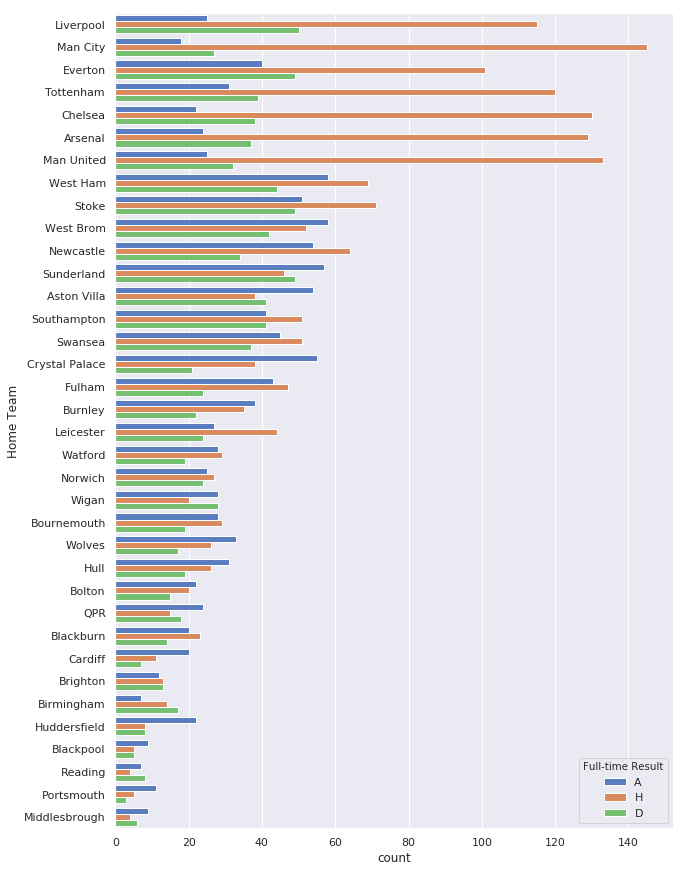

In [38]:
sns.set(rc={'figure.figsize':(10,15)})
sns.countplot(y="Home Team", hue = "Full-time Result", data=agg_epl, 
              order = agg_epl['Home Team'].value_counts().index, palette='muted')

In [ ]:

#total_wins.sort_values(["Full-time Result","Count"], ascending=False, axis=0)